Multiclass Classification CNN Model:

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1462 - accuracy: 0.9567 - val_loss: 0.0619 - val_accuracy: 0.9810
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0530 - val_accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0489 - val_accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0510 - val_accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0535 - val_accuracy: 0.9851


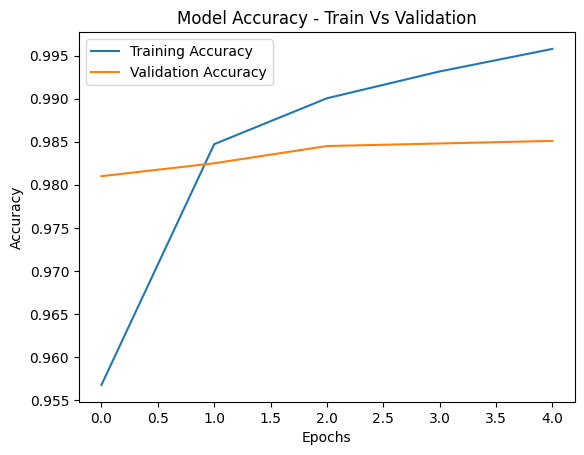

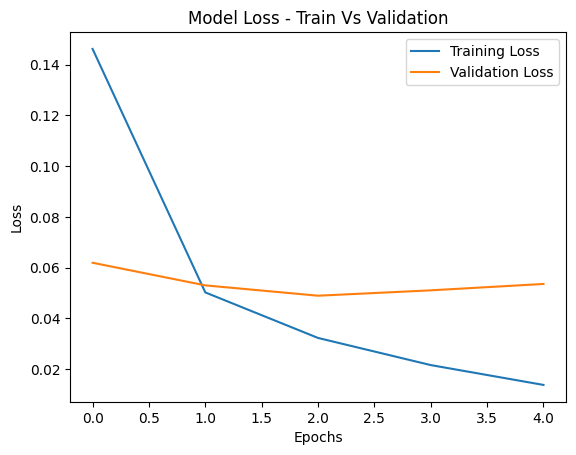

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# Expand dimensions to add a channel dimension (for grayscale images)
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

# Build the CNN model for multiclass classification
model_multiclass = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Multiclass classification, so use softmax activation
])

# Compile the model
model_multiclass.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Train the model
result_multiclass = model_multiclass.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot the training and validation accuracy
plt.plot(result_multiclass.history['accuracy'], label='Training Accuracy')
plt.plot(result_multiclass.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - Train Vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(result_multiclass.history['loss'], label='Training Loss')
plt.plot(result_multiclass.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Train Vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
